# Trabalho Prático 2:

**Projeto Integrador V**


Analise de dados covid 2020


In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Antes de executar essa linha de código
# Colocar o dataset disponibilizado na pasta Colab Notebooks e também este template
%cd /content/drive/My Drive/Colab Notebooks


/content/drive/My Drive/Colab Notebooks
covid19-12_2020.csv


In [ ]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Visualizando as colunas do dataset
covid_data = pd.read_csv('covid19-12_2020.csv')
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [ ]:
# Visualizando os tipos de cada coluna
# RangeIndex -> ou seja, há 3984 linhas
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3811 non-null   object 
 3   Country_Region       3984 non-null   object 
 4   Last_Update          3984 non-null   object 
 5   Lat                  3897 non-null   float64
 6   Long_                3897 non-null   float64
 7   Confirmed            3984 non-null   int64  
 8   Deaths               3984 non-null   int64  
 9   Recovered            3984 non-null   int64  
 10  Active               3982 non-null   float64
 11  Combined_Key         3984 non-null   object 
 12  Incident_Rate        3894 non-null   float64
 13  Case_Fatality_Ratio  3938 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 435.9+ KB


In [ ]:
# Visualizando as cinco primeiras linhas do dataset
covid_data.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3265.000000,3897.000000,3897.000000,3.984000e+03,3984.000000,3.984000e+03,3.982000e+03,3894.000000,3938.000000
mean,32386.688208,35.973564,-72.005376,1.607449e+04,386.052962,1.030273e+04,5.365738e+03,4071.231295,1.904120
std,18017.294540,13.043953,53.751137,8.244813e+04,2334.324711,1.041107e+05,9.587182e+04,2596.219864,3.486971
min,66.000000,-52.368000,-174.159600,0.000000e+00,0.000000,0.000000e+00,-5.226581e+06,0.000000,0.000000
25%,19049.000000,33.268798,-96.616867,4.732500e+02,6.000000,0.000000e+00,3.960000e+02,2216.191317,0.819672
50%,30067.000000,37.946365,-86.854759,1.344000e+03,21.000000,0.000000e+00,1.146000e+03,3860.827151,1.480352
75%,47039.000000,42.220792,-77.492245,5.320750e+03,81.000000,0.000000e+00,3.615250e+03,5512.511852,2.380952
max,99999.000000,71.706900,178.065000,2.231344e+06,53158.000000,5.226581e+06,2.034563e+06,20475.169114,175.567409


In [ ]:
# verificação se há dados ausentes ou valor nulo
# Por exemplo, a coluna Province_State está com 173 linhas faltantes 
covid_data.isna().sum()

FIPS                   719
Admin2                 714
Province_State         173
Country_Region           0
Last_Update              0
Lat                     87
Long_                   87
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incident_Rate           90
Case_Fatality_Ratio     46
dtype: int64

1- Apresente um gráfico contendo 3 de linhas (com as suas respectivas legendas), onde cada linha representa: total de mortes, total de casos confirmados e total de recuperados no país. O gráfico deve apresentar somente os países com a quantidade de mortes superiores a 20000 de forma decrescente. 

**Obs: a coluna Y representa número total e a coluna X os países identificados.**

<ipython-input-11-dc4de4b5c14a>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = covid_data.groupby('Country_Region').sum()


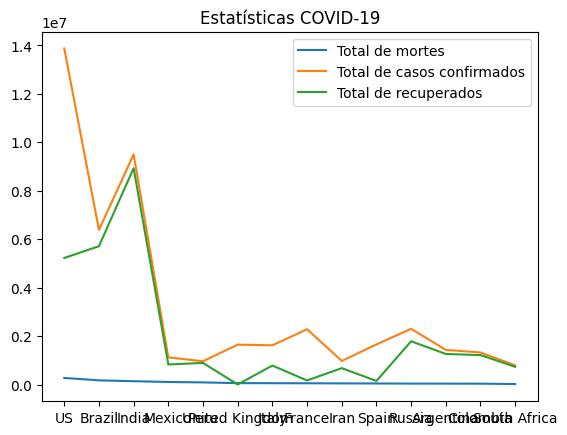

In [ ]:
# # determinacao das colunas 
# colunas_desejadas = ['Deaths', 'Confirmed', 'Recovered','Country_Region']

# # aloca o dataframe apenas com as colunas desejadas
# df_selecao = covid_data[colunas_desejadas]

# # realiza a soma e aloca seu valor
# total_mortes = df_selecao['Deaths'].sum()
# total_casos_confirmados = df_selecao['Confirmed'].sum()
# total_casos_recuperados = df_selecao['Recovered'].sum()


# Agrupando os dados por país e calculando as somas
grouped = covid_data.groupby('Country_Region').sum()

# Filtrando os países com mais de 20000 mortes e ordenando em ordem decrescente
filtered = grouped[grouped['Deaths'] > 20000].sort_values('Deaths', ascending=False)

# Criando o gráfico de linhas
plt.plot(filtered.index, filtered['Deaths'], label='Total de mortes')
plt.plot(filtered.index, filtered['Confirmed'], label='Total de casos confirmados')
plt.plot(filtered.index, filtered['Recovered'], label='Total de recuperados')

# Configurando o título e as legendas do gráfico
plt.title('Estatísticas COVID-19')
plt.legend()

# Mostrando o gráfico
plt.show()



2- Apresente um gráfico de barras, onde cada barra representa um estado brasileiro com a quantidade de mortes acima de 3000 de forma decrescente. 

**Obs: a coluna Y representa número total e a coluna X os estados brasileiros identificados.**

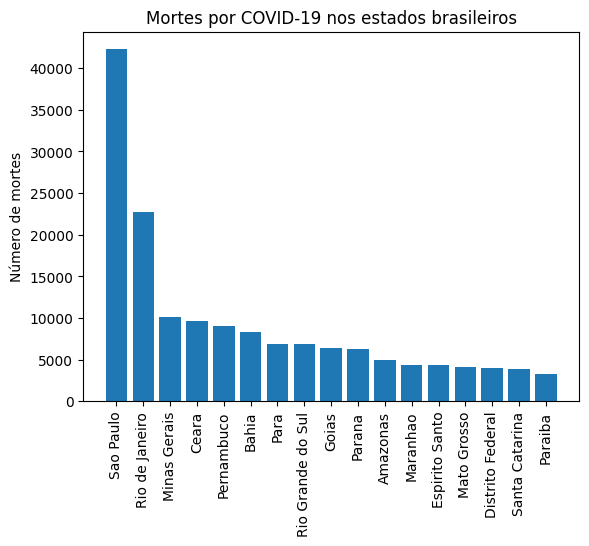

In [ ]:
# Filtrando os estados brasileiros com mais de 3000 mortes e ordenando em ordem decrescente
filtered = covid_data[(covid_data['Country_Region'] == 'Brazil') & (covid_data['Deaths'] > 3000)].sort_values('Deaths', ascending=False)

# Criando o gráfico de barras
plt.bar(filtered['Province_State'], filtered['Deaths'])

# Configurando o título e o eixo y do gráfico
plt.title('Mortes por COVID-19 nos estados brasileiros')
plt.ylabel('Número de mortes')

# Rotacionando os nomes dos estados para melhor visualização
plt.xticks(rotation=90)

# Mostrando o gráfico
plt.show()


3- Apresente em ordem crescente os 10 estados brasileiros com menos casos recuperados em formato de barra.

**Obs: a coluna Y representa número total e a coluna X os estados brasileiros identificados.**

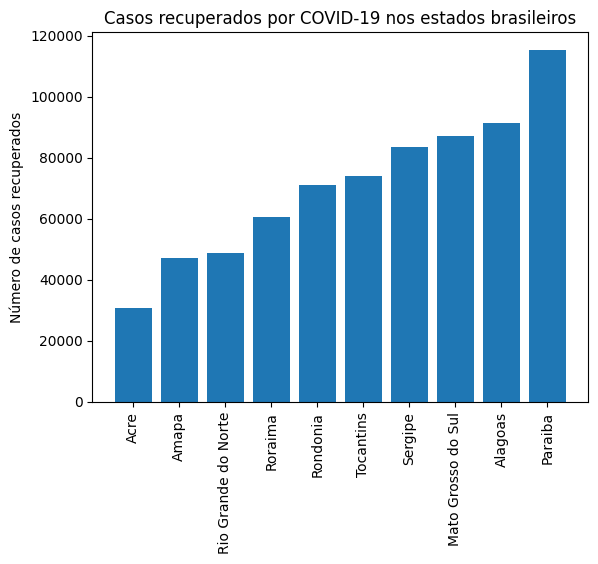

In [ ]:
# Filtrando os estados brasileiros com menos casos recuperados e ordenando em ordem crescente
filtered = covid_data[covid_data['Country_Region'] == 'Brazil'].sort_values('Recovered').head(10)

# Criando o gráfico de barras
plt.bar(filtered['Province_State'], filtered['Recovered'])

# Configurando o título e o eixo y do gráfico
plt.title('Casos recuperados por COVID-19 nos estados brasileiros')
plt.ylabel('Número de casos recuperados')

# Rotacionando os nomes dos estados para melhor visualização
plt.xticks(rotation=90)

# Mostrando o gráfico
plt.show()

4- Continuação do Item 3, agrupe os valores de  total de mortes, total recuperados e total de casos confirmados e apresente em formato de [grupo de barras](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html) dos estados brasileiros com menos casos recuperados. 

Dica: Adicionar mais duas barras (total de mortes e total de casos confirmados) em cada barra do Item 3.
    
**Obs: a coluna Y representa número total e a coluna X os estados brasileiros identificados.**

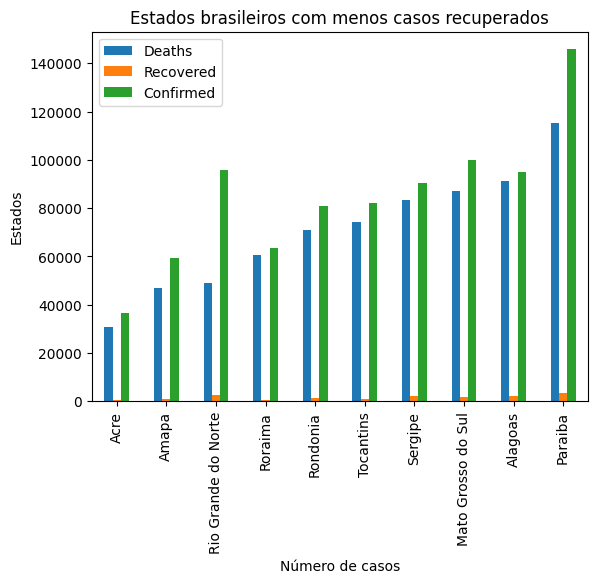

In [ ]:
  # # Filtrando os estados brasileiros com menos casos recuperados e ordenando em ordem crescente
# filtered = covid_data[covid_data['Country_Region'] == 'Brazil'].sort_values('Recovered').head(10)

# # Criando o gráfico de barras agrupado
# fig, ax = plt.subplots()
# bar_width = 0.2

# # Criando as barras para cada métrica
# recuperados = ax.bar(filtered['Province_State'], filtered['Recovered'], bar_width, label='Recuperados')
# mortes = ax.bar(filtered['Province_State'] + bar_width, filtered['Deaths'], bar_width, label='Mortes')
# casos_confirmados = ax.bar(filtered['Province_State'] + 2 * bar_width, filtered['Confirmed'], bar_width, label='Casos confirmados')

# # Configurando o título e os eixos do gráfico
# ax.set_title('Dados de COVID-19 nos estados brasileiros')
# ax.set_ylabel('Número de casos')
# ax.set_xticks(filtered['Province_State'])
# ax.legend()

# # Rotacionando os nomes dos estados para melhor visualização
# plt.xticks(rotation=90)

# # Mostrando o gráfico
# plt.show()

# Filtrando os estados brasileiros com menos casos recuperados e ordenando em ordem crescente
filtered = covid_data[covid_data['Country_Region'] == 'Brazil'].sort_values('Recovered').head(10)
casos_estados  = filtered.groupby('Province_State').agg({'Recovered': 'sum', 'Deaths': 'sum','Confirmed':'sum'})
dados_por_estado = casos_estados.sort_values(by='Recovered')

ax = dados_por_estado.plot(kind='bar', stacked=False)
ax.set_xlabel('Número de casos')
ax.set_ylabel('Estados')
ax.set_title('Estados brasileiros com menos casos recuperados')
ax.legend(['Deaths', 'Recovered', 'Confirmed'], loc='upper left')
plt.show()

5- (Questão aberta 1) Apresente alguma(s) informação(ões) que o grupo identificou, por meio de um gráfico qualquer, que não conste em nenhum item anterior e explique.

<ipython-input-15-e5b61f0b2bb6>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_cases = covid_data.groupby(['Last_Update']).sum()['Confirmed']


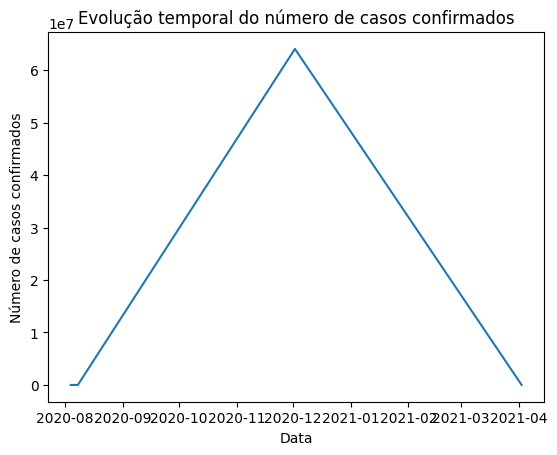

In [ ]:
covid_data['Last_Update'] = pd.to_datetime(covid_data['Last_Update'])

daily_cases = covid_data.groupby(['Last_Update']).sum()['Confirmed']

plt.plot(daily_cases.index, daily_cases.values)
plt.xlabel('Data')
plt.ylabel('Número de casos confirmados')
plt.title('Evolução temporal do número de casos confirmados')
plt.show()


6- (Questão aberta 2) Apresente alguma(s) informação(ões) que o grupo identificou, por meio de um gráfico qualquer, que não conste em nenhum item anterior e explique.

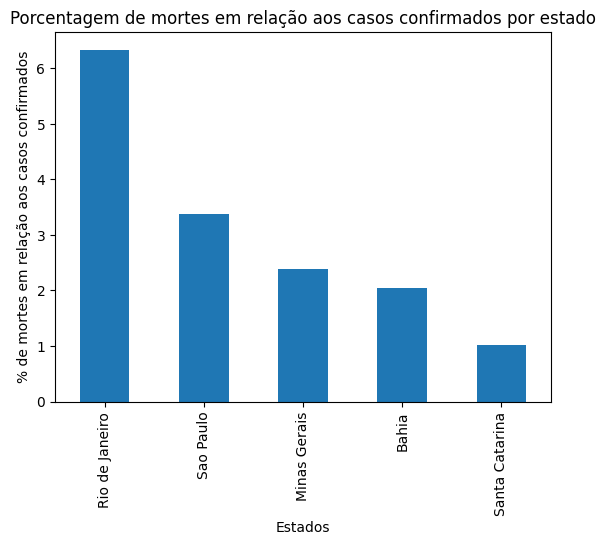

In [ ]:

# Filtrando os estados brasileiros com menos casos recuperados e ordenando em ordem crescente
filtered = covid_data[covid_data['Country_Region'] == 'Brazil'].sort_values('Recovered',ascending=False).head(5)
casos_estados  = filtered.groupby('Province_State').agg({'Recovered': 'sum', 'Deaths': 'sum','Confirmed':'sum'})
porcMortes = casos_estados['Deaths']/casos_estados['Confirmed']*100
dados_por_estado = porcMortes.sort_values(ascending=False)
ax = dados_por_estado.plot(kind='bar')

ax.set_xlabel('Estados')
ax.set_ylabel('% de mortes em relação aos casos confirmados')
ax.set_title('Porcentagem de mortes em relação aos casos confirmados por estado')

plt.show()